In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Fetching data from sqlite database which is opensourse

In [15]:
# uploaded=files.upload("database.sqlite")

In [16]:
import sqlite3

In [17]:
con = sqlite3.connect(r'C:\Users\Kiran\Downloads\Data Analysis Resources-20251210T124156Z-1-001\Data Analysis Resources/database.sqlite')

In [18]:
type(con)

sqlite3.Connection

In [19]:
df = pd.read_sql_query("SELECT * FROM REVIEWS" , con)

In [20]:
df.shape

(568454, 10)

In [21]:
type(df)

pandas.core.frame.DataFrame

In [22]:
df.head(4)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...


In [23]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

'HelpfulnessNumerator' means "Number of people who found the review helpful".(on ecommerse site with number )

'HelpfulnessDenominator' means "Number of people who indicated whether or not the review was helpful"

Note:- 'HelpfulnessNumerator'< 'HelpfulnessDenominator' MEANS Numerator is must be less than or equal to denomerator for "Valid row condition"
if condition get false then its invalid row.

In [24]:
## To check Invalid row
df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568454, dtype: bool

In [25]:
df[df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']]  ## Invalid rows details

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [26]:
df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]   ## Valid rows details

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [27]:
df_valid = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']] ##filter valid rows from database

df_valid.shape

(568452, 10)

In [28]:
## Remove duplicate rows to get unbaised result
df_valid.columns

#here, 'UserId', 'ProfileName','Time','Text(review)' all four column is used for filteration as time and reivew won't be same for same product.

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [29]:
df_valid.duplicated(['UserId', 'ProfileName','Time','Text']) ##using this 4 columns for fliter rows which are duplicate,buz no row has same data.

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568452, dtype: bool

dtype means datatype in bool which show if 'false return' means that particular rows are not duplicated & vice vrsa (True=>rows are duplicated)

In [30]:
df_valid[df_valid.duplicated(['UserId', 'ProfileName','Time','Text'])]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
2323,2324,B0001VWE0C,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
...,...,...,...,...,...,...,...,...,...,...
568409,568410,B0018CLWM4,A2PE0AGWV6OPL7,Dark Water Mermaid,3,3,5,1309651200,Quality & affordable food,I was very pleased with the ingredient quality...
568410,568411,B0018CLWM4,A88HLWDCU57WG,R28,2,2,5,1332979200,litter box,My main reason for the five star review has to...
568411,568412,B0018CLWM4,AUX1HSY8FX55S,DAW,1,1,5,1319500800,Happy Camper,I bought this to try on two registered Maine C...
568412,568413,B0018CLWM4,AVZ2OZ479Q9E8,Ai Ling Chow,0,0,5,1336435200,Two Siberians like it!,When we brought home two 3-month-old purebred ...


174521 rows out of 568452 (valid rows),174521 are duplicate count in Data, so we have to drop those duplicated rows

In [31]:
### Return DataFrame with duplicate rows removed.

data = df_valid.drop_duplicates(subset=['UserId', 'ProfileName','Time','Text'])

In [32]:
## show rows without duplicate data
data.shape  ## after droping rows from total row this are remaining valid rows 393931 to perform futher operarions

(393931, 10)

In [33]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [34]:
## get time value in integer format in squence
data['Time']

0         1303862400
1         1346976000
2         1219017600
3         1307923200
4         1350777600
             ...    
568449    1299628800
568450    1331251200
568451    1329782400
568452    1331596800
568453    1338422400
Name: Time, Length: 393931, dtype: int64

In [35]:
## Conversion int into datetime function

pd.to_datetime(data['Time'])

0        1970-01-01 00:00:01.303862400
1        1970-01-01 00:00:01.346976000
2        1970-01-01 00:00:01.219017600
3        1970-01-01 00:00:01.307923200
4        1970-01-01 00:00:01.350777600
                      ...             
568449   1970-01-01 00:00:01.299628800
568450   1970-01-01 00:00:01.331251200
568451   1970-01-01 00:00:01.329782400
568452   1970-01-01 00:00:01.331596800
568453   1970-01-01 00:00:01.338422400
Name: Time, Length: 393931, dtype: datetime64[ns]

 dtype: datetime64[ns] --> ns is nano second

In [36]:
## converion or customise unit parameter which is in nano second into 'Second'

data['Time'] = pd.to_datetime(data['Time'], unit='s')

C:\Users\Kiran\AppData\Local\Temp\ipykernel_12120\201632464.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time'] = pd.to_datetime(data['Time'], unit='s')


above wil gives warning , which can be removed from importing warning package

In [37]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [38]:
data['Time']

0        2011-04-27
1        2012-09-07
2        2008-08-18
3        2011-06-13
4        2012-10-21
            ...    
568449   2011-03-09
568450   2012-03-09
568451   2012-02-21
568452   2012-03-13
568453   2012-05-31
Name: Time, Length: 393931, dtype: datetime64[ns]

### statement1:- Analyse to what User Amazon can recommnend more product?

recommnedation is based on the product which buy more or who have better conversion rate.
* In layman word, conversion rate means a person go to amazon site and check 'iphone' after he went to 'Youtube channel'
* to watch video ,there he will get ad about 'iphone' and amazon site link ,if person click on itand went on site and purchase 'iphone' is called high conversion rate.

In [39]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [40]:
data['ProfileName']

0                              delmartian
1                                  dll pa
2         Natalia Corres "Natalia Corres"
3                                    Karl
4           Michael D. Bigham "M. Wassir"
                       ...               
568449                   Lettie D. Carter
568450                          R. Sawyer
568451                      pksd "pk_007"
568452            Kathy A. Welch "katwel"
568453                           srfell17
Name: ProfileName, Length: 393931, dtype: object

In [41]:
data['ProfileName'].unique()  ##shows unique name of profile on amaazon

array(['delmartian', 'dll pa', 'Natalia Corres "Natalia Corres"', ...,
       'Lettie D. Carter', 'pksd "pk_007"', 'srfell17'], dtype=object)

In [42]:
data['ProfileName'].value_counts()  ##nunique() works same

ProfileName
Gary Peterson                             329
C. F. Hill "CFH"                          279
Rebecca of Amazon "The Rebecca Review"    259
Chris                                     218
O. Brown "Ms. O. Khannah-Brown"           214
                                         ... 
K. Brennan "Baking fool"                    1
carlyowu                                    1
Katherine Kelly                             1
maudlin666                                  1
nyxport                                     1
Name: count, Length: 218418, dtype: int64

In [43]:
data['ProfileName'].nunique()  ##show count of unique name shown above.

218418

 but there is possiblity have same profile name present so,using UserId which is unique for everyone.

In [44]:
data['UserId'].unique()  ##Replace profile name with UserId which is always Unique.

array(['A3SGXH7AUHU8GW', 'A1D87F6ZCVE5NK', 'ABXLMWJIXXAIN', ...,
       'A28KG5XORO54AY', 'A121AA1GQV751Z', 'A3LGQPJCZVL9UC'], dtype=object)

In [45]:
data['UserId'].nunique() ##count of unique userId

256059

**now, i want data of UserID with factor like no.of summaries,no.of text, avg.ratings given by user,& no.of products has purchased by particular user.**

this all aggregating (count)function on factor.and which is stored in key-value paired (dictionary)

**key will be 'feature name'on which we have to perform operationas & value will be 'function' that I want to apply.**

In [46]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [47]:
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [48]:
## "Group by" function is used on UserId

data.groupby(['UserId']).agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'})

,Summary,Text,Score,ProductId
UserId,,,,
#oc-R103C0QSV1DF5E,1,1,5.000000,1
#oc-R109MU5OBBZ59U,1,1,5.000000,1
#oc-R10LFEMQEW6QGZ,1,1,5.000000,1
#oc-R10LT57ZGIB140,1,1,3.000000,1
#oc-R10UA029WVWIUI,1,1,1.000000,1
...,...,...,...,...
AZZV9PDNMCOZW,3,3,4.666667,3
AZZVNIMTTMJH6,1,1,5.000000,1
AZZY649VYAHQS,1,1,5.000000,1


In [49]:
### Sorting above data on productId basis using 'sort function' which need  argument: 'by' with feature name
##data is in Ascending order wanted to convert into descending order

data.groupby(['UserId']).agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'}).sort_values(by='ProductId',ascending=False)

,Summary,Text,Score,ProductId
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A1HRZKUDP9GC8,1,1,1.000000,1
A1HRZ2C8FH70YF,1,1,5.000000,1
AZZ58AJ3HJCK8,1,1,5.000000,1


In [50]:
##Stored in new varible called recommend_df

recommend_df = data.groupby(['UserId']).agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'}).sort_values(by='ProductId',ascending=False)

recommend_df

,Summary,Text,Score,ProductId
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A1HRZKUDP9GC8,1,1,1.000000,1
A1HRZ2C8FH70YF,1,1,5.000000,1
AZZ58AJ3HJCK8,1,1,5.000000,1


In [51]:
## Manipulation of above columns

recommend_df.columns = ['Number_of_summaries', 'Number_text', 'avg_score', 'no._of_product_purchased']

In [52]:
recommend_df

,Number_of_summaries,Number_text,avg_score,no._of_product_purchased
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A1HRZKUDP9GC8,1,1,1.000000,1
A1HRZ2C8FH70YF,1,1,5.000000,1
AZZ58AJ3HJCK8,1,1,5.000000,1


#### Showing top 10  user

### Getting top 10 userid by using index

In [53]:
#recommend_df.index      -->##shows list of index lebel of userid

## recommend_df.index[0:10].values    --> it show no.of product purchased by top 10 userid

recommend_df.index[0:10]  ##get top 10 userId  from list who purchased highest product

Index(['AY12DBB0U420B', 'A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1YUL9PCJR3JTY',
       'A1Z54EM24Y40LL', 'A2MUGFV2TDQ47K', 'A3D6OI36USYOU1', 'AZV26LP92E6WU',
       'AKMEY1BSHSDG7', 'A2GEZJHBV92EVR'],
      dtype='object', name='UserId')

In [54]:
### we can get single column details like

#recommend_df.columns   #-->shows all columns in UserId

recommend_df[ 'no._of_product_purchased'][0:10]     ##shows top 10

UserId
AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
A2MUGFV2TDQ47K    161
A3D6OI36USYOU1    146
AZV26LP92E6WU     129
AKMEY1BSHSDG7     119
A2GEZJHBV92EVR    118
Name: no._of_product_purchased, dtype: int64

In [55]:
recommend_df[ 'no._of_product_purchased'][0:10].values     ##shows top 10 value in single line array

array([329, 278, 259, 214, 211, 161, 146, 129, 119, 118])

#### barplot showing top 10 userid with purchased  product count

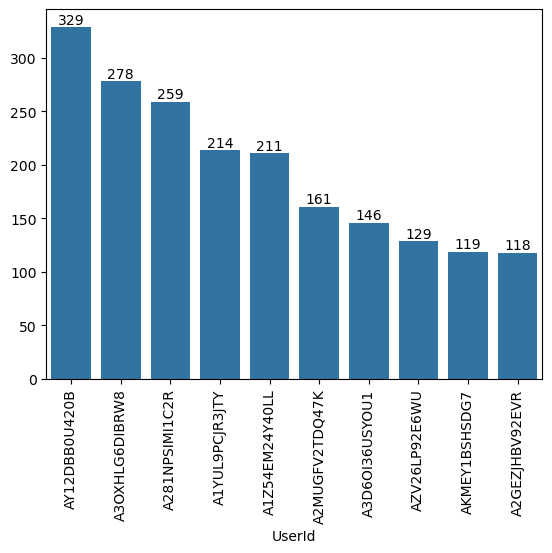

In [56]:
top_10_userId = sns.barplot(x=recommend_df.index[0:10],y=recommend_df[ 'no._of_product_purchased'][0:10].values)
for bar in top_10_userId.containers:
    top_10_userId.bar_label(bar)
plt.xticks(rotation= 90)  ## or plt.xticks(rotation='vertical')
plt.show()

### Note: This top_10_userId are highly amazon recommanded product.

## Statement no.2--Which product has good number of Reviews?

In [57]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [58]:
data['ProductId'].nunique()  ##count of product or types of product we have in data

67624

### --> will do analysis of which frequent sold product & which has good number of reviews
##keep some threshold value to those product has more than 500times sold (>500)


In [59]:
## this are productId with thier sold values by using value_counts() function
prod_count = data['ProductId'].value_counts().to_frame()  ## to_frame() function is used for better & neat visualisation

In [60]:
prod_count

,count
ProductId,
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
...,...
B006SQBRMA,1
B001EO5TPM,1
B001RN2W4Q,1


In [61]:
## Conversion of boolean format count into interger
(prod_count>500)  ##product sold above 500


,count
ProductId,
B007JFMH8M,True
B002QWP89S,True
B003B3OOPA,True
B001EO5Q64,True
B0013NUGDE,True
...,...
B006SQBRMA,False
B001EO5TPM,False
B001RN2W4Q,False


In [62]:
prod_count[prod_count>500]  ##why this count getting in NaN and value in float

,count
ProductId,
B007JFMH8M,912.0
B002QWP89S,630.0
B003B3OOPA,622.0
B001EO5Q64,566.0
B0013NUGDE,558.0
...,...
B006SQBRMA,NaN
B001EO5TPM,NaN
B001RN2W4Q,NaN


 #### most sold productid (i.e is greater than 500)
prod_count[prod_count>500].index  

In [63]:
##putting in variable, frequent_prod_id (mostly sold )
frequent_prod_ids = prod_count[prod_count>500].index

In [64]:
frequent_prod_ids

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE',
       'B000KV61FC', 'B000UBD88A', 'B000NMJWZO', 'B005K4Q37A', 'B0090X8IPM',
       ...
       'B0000VLRGA', 'B000YTAYQ2', 'B003HP8CIW', 'B002E4AFJQ', 'B0059WXJKM',
       'B006SQBRMA', 'B001EO5TPM', 'B001RN2W4Q', 'B004BRECP2', 'B0001PB9FE'],
      dtype='object', name='ProductId', length=67624)

In [65]:
data['ProductId'].isin(frequent_prod_ids)

0         True
1         True
2         True
3         True
4         True
          ... 
568449    True
568450    True
568451    True
568452    True
568453    True
Name: ProductId, Length: 393931, dtype: bool

In [66]:
## convertion in dataframe name 'freq_product_df'
freq_product_df = data[data['ProductId'].isin(frequent_prod_ids)]

In [67]:
freq_product_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011-03-09,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012-03-09,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [68]:
freq_product_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

#### ploting barchart in seaborn library for better Visulisation of Frequent ProductId by grouping with 'Score/Rating'
* x-lebel is count or score of review
* y-lebel shows product id

Note:- Score shows rating over Product Id by UserId

In [ ]:
sns.countplot(x='ProductId',data=freq_product_df)
plt.xticks(rotation=90)

### Statement No.3:- Is there any difference between behaviour of frequent viewers & not frequent viewers?

* Let consider, if user view 50 times or more productId will be frequent Viewer and less than 50times will not frequent viewer.

In [71]:
## show UserId brought no.of product/product count
x=data['UserId'].value_counts()  # x is variable in series form
x

UserId
AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
                 ... 
A1FVF43OQJE2AH      1
A1MNIZYWGVRVGF      1
A2CLE7G5FK24AU      1
A10R47UIIJHJQT      1
A25RYX4NFWDJ2N      1
Name: count, Length: 256059, dtype: int64

In [72]:
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


#### To create New column name 'Viewer Type' for better understanding of frequent viewer & not frequent viewer.

In [73]:
## putting condition if x>50 will put "Frequent" and if not in x then will put "Not Frequent"  in series column name 'Viewer Type'
data['UserId'].apply(lambda user: "Frequent" if x[user]>50 else "Not Frequent")  

0         Not Frequent
1         Not Frequent
2         Not Frequent
3         Not Frequent
4         Not Frequent
              ...     
568449    Not Frequent
568450    Not Frequent
568451    Not Frequent
568452    Not Frequent
568453    Not Frequent
Name: UserId, Length: 393931, dtype: object

In [74]:
data['viewer_type']=data['UserId'].apply(lambda user: "Frequent" if x[user]>50 else "Not Frequent")  
data.head(30)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,2012-07-12,Nice Taffy,I got a wild hair for taffy and ordered this f...,Not Frequent
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,2012-06-20,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,Not Frequent
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,2012-05-03,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,Not Frequent
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,2011-11-23,Yay Barley,Right now I'm mostly just sprouting this so my...,Not Frequent
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,2012-10-26,Healthy Dog Food,This is a very healthy dog food. Good for thei...,Not Frequent


In [75]:
# To checking data in viewer_type column
data['viewer_type'].unique()

array(['Not Frequent', 'Frequent'], dtype=object)

In [76]:
data['viewer_type']=='Not Frequent'

0         True
1         True
2         True
3         True
4         True
          ... 
568449    True
568450    True
568451    True
568452    True
568453    True
Name: viewer_type, Length: 393931, dtype: bool

In [77]:
# Assigning 'Not Frequent and Frequent' type to variable
not_freq_DF = data[data['viewer_type']=='Not Frequent']
freq_DF = data[data['viewer_type']=='Frequent']

In [78]:
# To count of Score/rating for Frequent type data
freq_DF['Score'].value_counts()

Score
5    5765
4    1979
3     897
2     368
1     349
Name: count, dtype: int64

In [79]:
## conversion into percentile  for frequent viewer
freq_DF['Score'].value_counts()/len(freq_DF)*100

Score
5    61.605044
4    21.147681
3     9.585381
2     3.932464
1     3.729429
Name: count, dtype: float64

#### note:- 61.60% user's are frequent viewer with 5 rating star.

In [80]:
# To count of Score/rating for non Frequent Viewer type data
not_freq_DF['Score'].value_counts()

Score
5    245196
4     54114
1     35957
3     28872
2     20434
Name: count, dtype: int64

In [81]:
## conversion into percentile for non frequent viewer
not_freq_DF['Score'].value_counts()/len(not_freq_DF)*100

Score
5    63.757986
4    14.071191
1     9.349850
3     7.507547
2     5.313426
Name: count, dtype: float64

#### note:- 63.75% user's are Non-frequent viewer with 5 rating star.

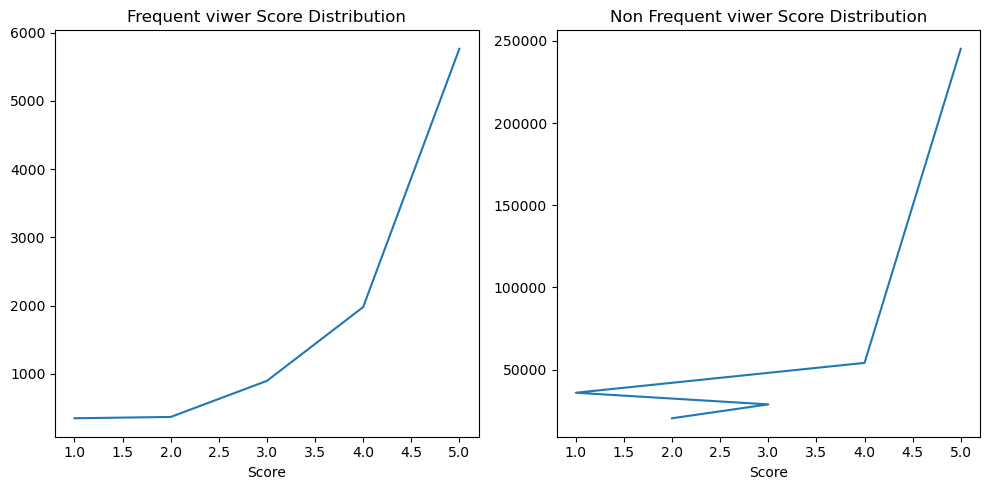

In [ ]:
## Plotting line chart for freq_DF of frequent viwer type and non-frequent viwer type
plt.figure(figsize=(10,5))
## subplot 1 for frequent viwer type
plt.subplot(1,2,1)
freq_DF['Score'].value_counts().plot(kind='line')
plt.title("Frequent viwer Score Distribution")

## subplot 2 for not frequent viwer type
plt.subplot(1,2,2)
not_freq_DF['Score'].value_counts().plot(kind='line')
plt.title("Non Frequent viwer Score Distribution")

plt.tight_layout()
plt.show()

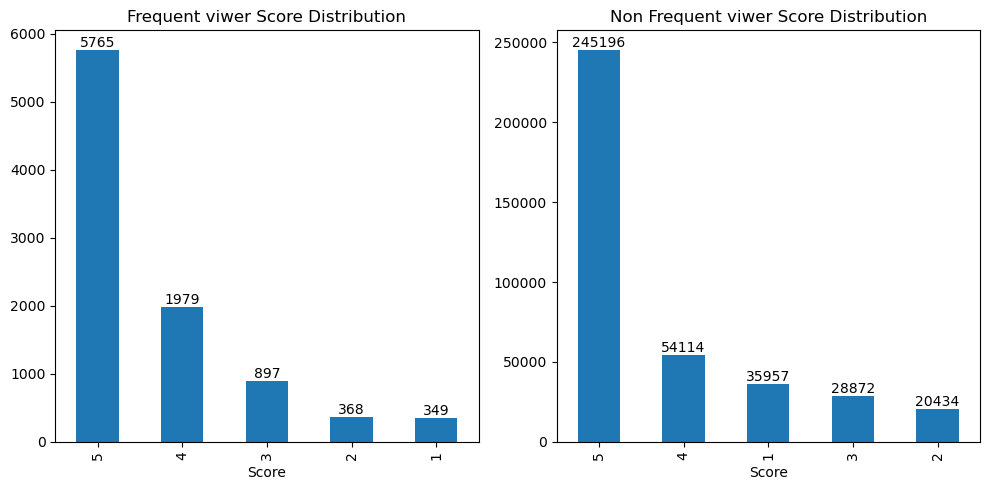

In [ ]:
## Plotting bar chart for freq_DF of frequent viwer type and non-frequent viwer type
plt.figure(figsize=(10,5))
## subplot 1 for frequent viwer type
plt.subplot(1,2,1)
A = freq_DF['Score'].value_counts().plot(kind='bar')
for i in A.containers:
    A.bar_label(i)
plt.title("Frequent viwer Score Distribution")

## subplot 2 for not frequent viwer type
plt.subplot(1,2,2)
B = not_freq_DF['Score'].value_counts().plot(kind='bar')
for i in B.containers:
    B.bar_label(i)
plt.title("Non Frequent viwer Score Distribution")


plt.tight_layout()
plt.show()

#### Statement3. Are frequent users more verbose(total words)?

##### above statement means that those viewer or customer(as per userid) mostly frequently purchased product has written review/feedback in more words or having sentence -line

In [82]:
## specific userid write text or review for product on productId
data[['UserId','ProductId','Text']]

,UserId,ProductId,Text
0,A3SGXH7AUHU8GW,B001E4KFG0,I have bought several of the Vitality canned d...
1,A1D87F6ZCVE5NK,B00813GRG4,Product arrived labeled as Jumbo Salted Peanut...
2,ABXLMWJIXXAIN,B000LQOCH0,This is a confection that has been around a fe...
3,A395BORC6FGVXV,B000UA0QIQ,If you are looking for the secret ingredient i...
4,A1UQRSCLF8GW1T,B006K2ZZ7K,Great taffy at a great price. There was a wid...
...,...,...,...
568449,A28KG5XORO54AY,B001EO7N10,Great for sesame chicken..this is a good if no...
568450,A3I8AFVPEE8KI5,B003S1WTCU,I'm disappointed with the flavor. The chocolat...
568451,A121AA1GQV751Z,B004I613EE,"These stars are small, so you can give 10-15 o..."
568452,A3IBEVCTXKNOH,B004I613EE,These are the BEST treats for training and rew...


##### need to compute all text in number/count to get text length

In [83]:
## writting review/feedback a lot or not count by length with giving index i.e[0] for 1st row
data['Text'][0]  ### this is string format so, we cant use length function
#type(data['Text'][0])

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [84]:
## to count all words in text ,firstly we will convert into list by split() using space seperator
data['Text'][0].split(' ')
type(data['Text'][0].split(' '))

list

In [85]:
## to count total words in review/text sentence by using len()function
len(data['Text'][0].split(' '))

49

In [86]:
## now create define function for all text with thier index
def calculate_length(text):
    return len(text.split(' '))

In [87]:
## calling for dataframe text value
data['Text'].apply(calculate_length)

## storing in variable
data['Text_length']=data['Text'].apply(calculate_length)
data['Text_length']     ### 49 showing words in feedback sentense

0         49
1         31
2         99
3         43
4         30
          ..
568449    26
568450    46
568451    71
568452    37
568453    21
Name: Text_length, Length: 393931, dtype: int64

In [88]:
data['Text_length'].value_counts()

Text_length
23      6520
24      6348
22      6345
25      6230
26      6071
        ... 
1036       1
880        1
759        1
944        1
2233       1
Name: count, Length: 1017, dtype: int64

In [89]:
data['viewer_type'].unique()

array(['Not Frequent', 'Frequent'], dtype=object)

In [90]:
## we want daataframe for frequent and not frequent user  with  feature of text length as new column
not_freq_Data = data[data['viewer_type']=='Not Frequent']
freq_Data = data[data['viewer_type']=='Frequent']

In [91]:
## Showing Text Length column
not_freq_Data.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31


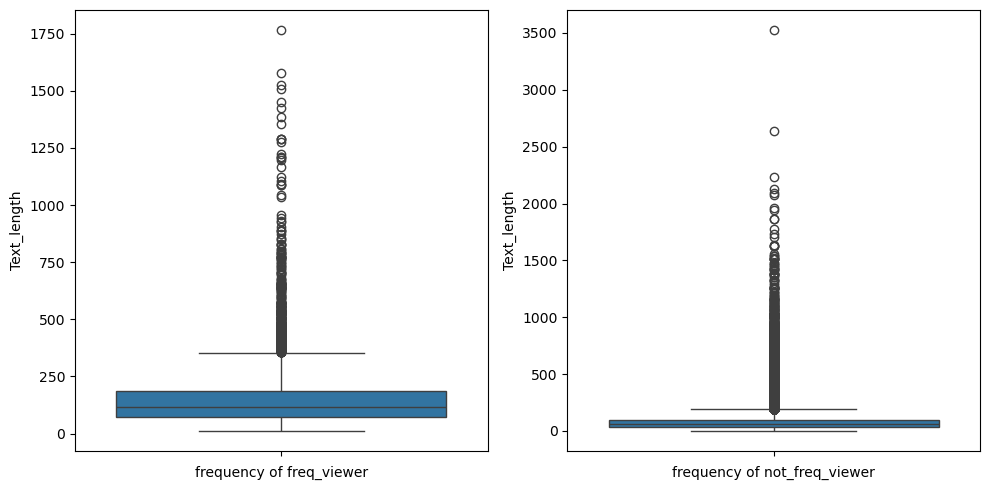

In [92]:
## Plotting box for finding outlier using seaborn lib.
## On x-axis-> text length of freq_data of frequent viwer type and text length of not_freq_data non-frequent viwer type

plt.figure(figsize=(10,5))
## subplot 1 for frequent viwer type
plt.subplot(1,2,1)
sns.boxplot(freq_Data['Text_length'])
plt.xlabel( 'frequency of freq_viewer')



## subplot 2 for not frequent viwer type
plt.subplot(1,2,2)
sns.boxplot(not_freq_Data['Text_length'])
plt.xlabel( 'frequency of not_freq_viewer')


plt.tight_layout()
plt.show()

#### Statement:- Sentimental analysis
(Analysing sentiment/feelings/Intention towards specific product which can be positive intent/sentiment or no intent/sentiment means neutral or negative intent/sentiment )

**Intent/sentiment can be measure in value known as Polarity Value,which lies in -1 to 0 to 1**

**if polarity value= 1 means positive sentence/Positive Feedback**

**if polarity value= 0 means neutral sentence/Neutral Feedback**

**if polarity value= -1 means negative sentence/Negative Feedback**

 ##### used for sentimental analysis over review/feedback

In [12]:
import re
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
print(sia.polarity_scores("This is a great product!"))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Kiran\AppData\Roaming\nltk_data...


{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}


In [10]:
!pip install textblob     

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 4.4 MB/s eta 0:00:00


In [ ]:
from textblob import TextBlob

In [93]:
data['Summary'][0]  ## text/review of first row

'Good Quality Dog Food'

In [94]:
TextBlob('Good Quality Dog Food').sentiment.polarity   ###shows polarity of text by sentiment function

0.7

polarity is 0.7 means its greater than 0 and near to 1 --> Its positive feedback

#### to make sentiment analysis we have huge data in summary column,so we going to extract some data as sample for analysis

In [95]:
data.shape  ##

(393931, 12)

In [96]:
## to extract sample by slicing 
sample = data[0:50000]

In [98]:
### extracting text(feedback) from summary column & done with sentimental analysis and store polarity value in empty list 
## for loop we using here
# there might be chances of getting exception in given code using try & exception block
polarity = []
for text in sample['Summary']:
    try:                                       
        polarity.append(TextBlob(text).sentiment.polarity)      ## text will written in empty polarity list
    except:
        polarity.append(0)

print(polarity)

[0.7, 0.0, 0.0, 0.0, 0.8, 0.6, 0.35833333333333334, 1.0, 0.0, 0.5, 0.625, 0.3333333333333333, 0.13636363636363635, 0.375, 0.0, 0.0, -0.4, 0.625, 0.61875, 0.0, 0.3, 0.0, 1.0, 0.0, 0.0, 0.0, -1.0, 0.8, 0.0, 1.0, 0.0, 0.5, 0.35, 0.4, 0.5, 0.640625, 0.0, 0.7, 0.5, 1.0, 0.0, 0.0, 0.475, 0.8, 0.0, 0.7, 0.0, 0.45499999999999996, 0.0, 0.0, 0.4375, 0.0, 0.0, 0.4, 0.625, 1.0, -0.625, 0.875, 0.8, 0.5, -0.125, -0.5, 0.0, 0.8, 0.8, 0.0, 0.7, 0.2, 0.0, 1.0, -0.0625, 1.0, 0.0, 0.35714285714285715, 0.0, 0.7, 0.8, -0.3, 1.0, 1.0, 0.8, 0.0, 0.1, 0.0, 1.0, 0.8, 1.0, 0.625, 0.8, 0.45, 0.8, 0.7, 1.0, 0.0, 0.6, 0.8, 0.4666666666666666, 0.5, -0.6999999999999998, 0.7, 0.8, 0.0, 0.0, 0.7, 1.0, -0.6, 0.0, 0.0, 0.7, 0.0, 1.0, -0.2, 0.688888888888889, 0.0, 1.0, 0.8, 0.375, 0.39999999999999997, 1.0, 0.8, 0.6041666666666666, 0.7, 0.5, 0.5625, 1.0, 0.0, 0.21250000000000005, 0.5, 0.0, 0.30000000000000004, 0.0, 0.8, 0.8, 0.8, 0.4, 0.925, 0.8, 0.5, 1.0, 0.6, 0.7, 1.0, 1.0, 0.0, 0.55, -0.5, 0.78125, 0.0, 1.0, 1.0, 1.0, 

In [99]:
## checking 50000 sample in polarity list
len(polarity)

50000

In [100]:
## let's assign polarity value in sample
sample['polarity'] = polarity

In [101]:
sample.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text_length,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,99,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,43,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,30,0.8


In [102]:
## to find positive and negative polarity
sample_negative = sample[sample['polarity']<0]
sample_positive = sample[sample['polarity']>0]

In [103]:
sample_negative

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text_length,polarity
16,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,2012-09-20,poor taste,I love eating them and they are good for watch...,Not Frequent,42,-0.400000
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,2012-03-25,Nasty No flavor,"The candy is just red , No flavor . Just plan...",Not Frequent,22,-1.000000
57,58,B004N5KULM,ASCNNAJU6SXF8,S. Beck,1,1,5,2012-05-05,How can you go wrong!,"It is chocolate, what can I say. Great variet...",Not Frequent,36,-0.625000
61,62,B004N5KULM,A7ZK2A3VIW7X9,Peggy,0,2,5,2011-10-24,pretty expensive,"This bag of candy online is pretty expensive, ...",Not Frequent,30,-0.125000
62,63,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,2,2,1,2008-07-06,stale product.,Arrived in 6 days and were so stale i could no...,Not Frequent,17,-0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54185,54186,B001D0FT0C,ARS0COV4PYKLF,toddler mom,0,0,1,2012-05-10,Horrible,"ProFlowers sent the flowers to ME, the buyer. ...",Not Frequent,31,-1.000000
54186,54187,B001D0FT0C,AOQ5WRZT9OKGJ,D. M. Castro,7,11,1,2012-02-14,Horrible idea,Ordered these to be delivered on the tenth of ...,Not Frequent,152,-1.000000
54191,54192,B004OVICTW,ALX6CSFZ6Z5XD,LizzieW,0,0,1,2011-10-06,STALE,This coffee and another WP variety that I ord...,Not Frequent,44,-0.500000
54212,54213,B0000TLRIA,A1UR9Y284SMTH7,SUZANNE G,0,0,2,2012-08-05,Disappointed,I ordered this because I ran out of another br...,Not Frequent,62,-0.750000


In [104]:
## finding negative feedback/text in summary 
## kewords used by custmoer or viewer in feedback

sample_negative['Summary']
#sample_positive['Summary']

16                  poor taste
26             Nasty No flavor
57       How can you go wrong!
61            pretty expensive
62              stale product.
                 ...          
54185                 Horrible
54186            Horrible idea
54191                    STALE
54212             Disappointed
54251      Just not very good!
Name: Summary, Length: 4658, dtype: object

In [107]:
##to get count of each specific word used frequently in negative sentence.

sample_negative['Summary'].value_counts().to_frame()    #head(10)  ##top 10 negative word

,count
Summary,
Disappointed,44
Disappointing,32
Bland,18
Awful,17
Not what I expected,17
...,...
Wider than normal lasagna noodles - won't fit into my pan :(,1
Not the same as original--much less fizz,1
"Tasty candy, sour and fizzy on inside",1


In [106]:
##to get count of each specific word used frequently in positive sentence.
sample_positive['Summary'].value_counts().to_frame()

,count
Summary,
Delicious!,208
Delicious,204
Great product,100
Excellent,85
Great,81
...,...
Such an excellent chip,1
Great Bargain for the Price,1
Great machine!,1


#### Those above are mostly frequently used negative and positive word used in feedback by viewer